<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">การวิเคราะห์ข้อมูลถดถอยลอจิสติก (Logistic Regression)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้</h1> 

In [2]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt
# นำเข้าไลบรารี pandas โดยตั้งชื่อว่า pd
import pandas as pd
# นำเข้าไลบรารี seaborn โดยตั้งชื่อว่า sns
import seaborn as sns

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 นำข้อมูลเข้า</h1>

In [3]:
data = pd.read_csv('mushroom_cleaned.csv') # อ่านไฟล์ csv ชื่อ 'mushroom_cleaned.csv' เราจะได้ตารางของข้อมูล (dataframe) เก็บไว้ในตัวแปรชื่อ data
data # แสดงผล dataframe                             

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


<h1 style="font-size: 18px;">1.2 สำรวจข้อมูล</h1>

In [4]:
data.info() # แสดงรายละเอียดของแต่ละคอลัมน์ใน data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [5]:
data.describe() # แสดงสถิติเบื้องต้นของแต่ละคอลัมน์ใน dataframe

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [6]:
# ตรวจสอบข้อมูลที่หายไปในแต่ละคอลัมน์
data.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [7]:
data[data.duplicated(keep=False)] # แสดงแถวที่มีแถวซ้ำ

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
8622,69,6,0,10,1.206059,125,1,0.888450,1
8815,69,6,0,10,1.206059,125,1,0.888450,1
11664,27,6,0,11,1.054858,24,12,0.888450,1
11930,27,6,0,11,1.054858,24,12,0.888450,1
33439,204,0,0,5,0.154755,271,6,0.027372,1
...,...,...,...,...,...,...,...,...,...
52001,249,3,3,2,2.013794,0,2,0.888450,1
52003,285,3,3,2,2.013794,0,2,0.888450,1
52005,268,3,3,2,2.013794,0,2,1.804273,1
52006,238,3,3,2,2.013794,0,2,0.888450,1


<h1 style="font-size: 18px;">1.3 คัดเลือกข้อมูล (data cleaning)</h1>

In [8]:
# ลบแถวที่มีซ้ำกันออกไป
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
53727,73,5,3,2,0.887740,569,12,0.943195,1
53728,82,2,3,2,1.186164,490,12,0.943195,1
53729,82,5,3,2,0.915593,584,12,0.888450,1
53730,79,2,3,2,1.034963,491,12,0.888450,1


<h1 style="font-size: 18px;">1.4 ดูความสัมพันธ์ของข้อมูล</h1>

1    29372
0    24360
Name: class, dtype: int64


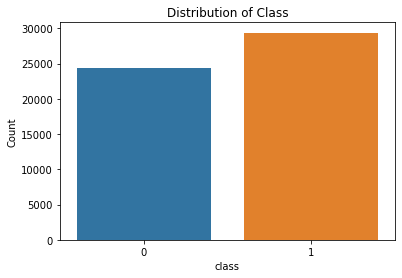

In [9]:
# แสดงจำนวนของแต่ละคลาสในคอลัมน์ 'class'
class_counts = data['class'].value_counts()
print(class_counts)

# แสดงการกระจายตัวของคลาสในคอลัมน์ 'class'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='class')
plt.title('Distribution of Class')
plt.xlabel('class')
plt.ylabel('Count')
plt.show()

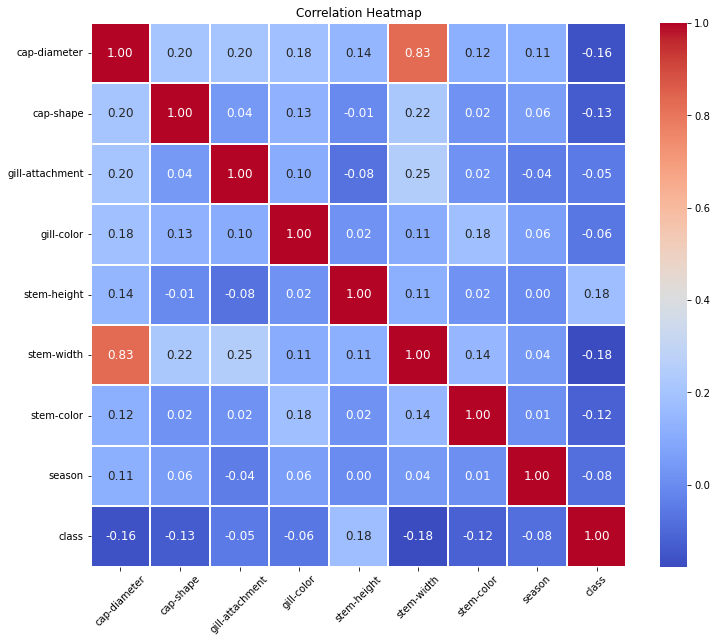

In [10]:
# สร้างกราฟ corelation ของแต่ละคอลัมน์ใน dataframe
corr_matrix = data.corr()  # เรียกดู correlation ของแต่ละคอลัมน์ใน dataframe
plt.figure(figsize=(12, 10)) # กำหนดขนาดของกราฟ
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.1, annot_kws={"size": 12}) # สร้างกราฟ correlation matrix 
plt.title('Correlation Heatmap') # ตั้งชื่อกราฟ
plt.xticks(rotation = 45) # หมุนตัวอีกษรแกน x เพื่อให้อ่านง่ายขึ้น
plt.show() # แสดงผล

In [11]:
data.corr()['class'].sort_values(ascending=False) # แสดงผลคอลัมน์ที่มี correlation กับ 'class' จากมากไปน้อย

class              1.000000
stem-height        0.175839
gill-attachment   -0.052397
gill-color        -0.060166
season            -0.083363
stem-color        -0.119940
cap-shape         -0.131385
cap-diameter      -0.162830
stem-width        -0.177310
Name: class, dtype: float64

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. ปรับปรุงข้อมูล (Data Preprocessing)</h1>

In [12]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ OneHotEncoder และ StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# นำฟังก์ชัน StandardScaler() เก็บไว้ในตัวแปร scaler
scaler = StandardScaler()
# นำฟังก์ชัน OneHotEncoder() เก็บไว้ในตัวแปร onehot_encoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first') 

<h1 style="font-size: 18px;">2.1 แบ่งข้อมูลเป็นส่วน Features และ Label</h1>

In [13]:
# X เป็น Features
X = data.drop('class', axis=1)
# y เป็น Label
y = data['class']

<h1 style="font-size: 18px;">2.2 ทำ One-Hot Encoding กับข้อมูลส่วน Features ที่เป็น Categorical Variable</h1>


In [14]:
# ทำ One-hot encode กับข้อมูลส่วน Features ที่เป็น Categorical Variable
categorical_cols = ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']

X_encoded = pd.DataFrame(onehot_encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = onehot_encoder.get_feature_names_out(categorical_cols)
X_encoded

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6,gill-attachment_1,gill-attachment_2,gill-attachment_3,gill-attachment_4,...,stem-color_6,stem-color_7,stem-color_8,stem-color_9,stem-color_10,stem-color_11,stem-color_12,season_0.8884502877862838,season_0.9431945538974952,season_1.804272708628173
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53727,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
53728,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
53729,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
53730,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<h1 style="font-size: 18px;">2.2 ทำการ Standardize ข้อมูลส่วน Features ที่ต้องการ</h1>

In [15]:
# ทำการ Standardize ข้อมูลส่วน Features ที่เป็น continuous variables
continuous_cols = ['cap-diameter', 'stem-height', 'stem-width']
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])
X

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,2.229226,2,2,10,4.729807,0.625435,11,1.804273
1,2.476186,2,2,10,4.729807,0.640815,11,1.804273
2,2.226451,2,2,10,4.427986,0.652349,11,1.804273
3,1.921218,6,2,10,4.699009,0.652349,11,1.804273
4,2.043311,6,2,10,4.581976,0.521623,11,0.943195
...,...,...,...,...,...,...,...,...
53727,-1.375292,5,3,2,0.209973,-0.625437,12,0.943195
53728,-1.350318,2,3,2,0.671943,-0.726686,12,0.943195
53729,-1.350318,5,3,2,0.253090,-0.606212,12,0.888450
53730,-1.358643,2,3,2,0.437878,-0.725404,12,0.888450


In [16]:
# ดรอปคอลัมน์ที่เป็น Categorical Variable อันเก่าทิ้ง และนำอันที่ One-Hot Encode แล้วมาใส่แทน
X = X.drop(categorical_cols, axis=1)
X_combined = pd.concat([X, X_encoded], axis=1)
X_combined

,cap-diameter,stem-height,stem-width,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6,gill-attachment_1,...,stem-color_6,stem-color_7,stem-color_8,stem-color_9,stem-color_10,stem-color_11,stem-color_12,season_0.8884502877862838,season_0.9431945538974952,season_1.804272708628173
0,2.229226,4.729807,0.625435,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.476186,4.729807,0.640815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.226451,4.427986,0.652349,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.921218,4.699009,0.652349,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2.043311,4.581976,0.521623,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53727,-1.375292,0.209973,-0.625437,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
53728,-1.350318,0.671943,-0.726686,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
53729,-1.350318,0.253090,-0.606212,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
53730,-1.358643,0.437878,-0.725404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. แบ่งส่วนข้อมูล (Train-Test Split)</h1>

In [17]:
# นำเข้าไลบรารี sklearn.model_selection เพื่อเรียกใช้ train_test_split
from sklearn.model_selection import train_test_split

In [18]:
# แบ่งส่วนข้อมูล X_combined เป็น X_train, X_test และ y เป็น y_train, y_test โดยมีอัตราส่วนแบ่งเป็น 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, train_size=0.7, random_state=42, stratify=y)

In [ ]:
print('length of X_train:',len(X_train),', length of X_test:', len(X_test)) # แสดงจำนวนข้อมูลใน X_train และ X_test

In [19]:
# หรืออีกวิธีหนึ่ง เราสามารถดู shape ของข้อมูลที่เราแบ่งได้ โดยใช้คำสั่ง .shape 
print('shape of X_train:', X_train.shape)   # ดู shape ของ X_train
print('shape of X_test:', X_test.shape)     # ดู shape ของ X_test
print('shape of y_train:', y_train.shape)   # ดู shape ของ y_train
print('shape of y_test:', y_test.shape)     # ดู shape ของ y_test

shape of X_train: (37612, 41)
shape of X_test: (16120, 41)
shape of y_train: (37612,)
shape of y_test: (16120,)


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">4. Logistic Regression model</h1>

In [20]:
# นำเข้าไลบรารี sklearn.linear_model เพื่อเรียกใช้ LogisticRegression
from sklearn.linear_model import LogisticRegression

<h1 style="font-size: 18px;">4.1 สร้างโมเดลและเทรนโมเดล</h1>

In [21]:
model = LogisticRegression()  # สร้างโมเดล Logistic Regression โดยเก็บไว้ที่ตัวแปร model

model.fit(X_train, y_train) # เทรนโมเดล หรือ ให้โมเดลเรียนรู้ชุดข้อมูลที่เราป้อนให้ นั่นคือ X_train และ y_train

c:\Users\CSIT-414\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
model.coef_ # ค่า w ของ Feature ที่ 1,2,3,4 และ 5 ที่ได้จากการเทรนโมเดล

array([[-0.1355306 ,  0.63522681, -0.02845136, -0.68631239, -1.33352661,
         1.03885771, -0.83272639, -1.35053562, -1.39475729,  0.4765886 ,
        -0.69346651, -0.19853515, -2.09838337,  0.09923247,  0.42903148,
         1.86631353, -0.19853515,  0.27403037,  0.56532801,  1.46523534,
         0.95239935,  0.70627308,  1.13123842,  1.00140442,  0.25009604,
         1.20029185,  1.95464096,  3.55138481, -0.32817828,  4.82200313,
         0.17950214,  1.16485446,  0.62856679,  2.82342982,  1.71752113,
         1.56654506,  0.11895485,  1.47854741,  1.59891309,  1.35273253,
        -0.25809175]])

In [23]:
model.intercept_ # ค่า b ที่ได้จากการเทรนโมเดล

array([-1.30396432])

<h1 style="font-size: 18px;"">4.2 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [25]:
y_pred_prob = model.predict_proba(X_test) # ให้โมเดลทำนาย label โดยพิจารณาจาก Features ทุกตัวที่ป้อนให้
print(y_pred_prob)

[[0.46751933 0.53248067]
 [0.24283451 0.75716549]
 [0.85303368 0.14696632]
 ...
 [0.26052714 0.73947286]
 [0.15538256 0.84461744]
 [0.51461266 0.48538734]]


In [26]:
y_pred = model.predict(X_test) # ให้โมเดลทำนาย label โดยพิจารณาจาก Features ทุกตัวที่ป้อนให้
print(y_pred)

[1 1 0 ... 1 1 0]


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">5. การวัดผลโมเดล (Model Evaluation)</h1>

ในการวัดผลการทำ Binary-Classification Model เราต้องรู้จัก Confusion Matrix ก่อน

In [27]:
from sklearn.metrics import confusion_matrix  # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ confusion_matrix

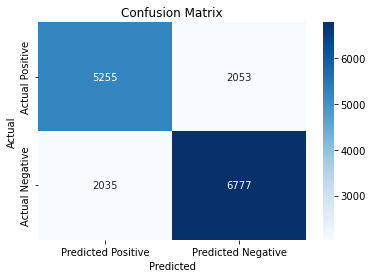

In [28]:
# สร้าง confusion matrix
conf_matrix_sample = confusion_matrix(y_test, y_pred)

# แสดง confusion matrix โดยใช้ไลบรารี seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_sample, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Positive", "Predicted Negative"],
            yticklabels=["Actual Positive", "Actual Negative"])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

จาก Confusion Matrix ด้านบน เราจึงได้ว่า
<div style=" border-radius: 5px; display: flex; align-items: center;">
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">True Positive (TP) = 5255</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">False Positive (FP) = 2053</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">False Negative (FN) = 2035</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">True Negative (TN) = 6777</h1>
</div>

<h1 style="font-size: 18px; font-weight: bold;">5.1 Accuracy - ค่าความแม่นยำ</h1>

- ความแม่นยำ เป็นตัววัดประสิทธิภาพที่เข้าใจได้ง่ายที่สุด มันคืออัตราส่วนของการทำนายที่ถูกต้องต่อการทำนายทั้งหมด
- สูตร:
$$\text{Accuracy} = \frac{\text{จำนวนการทำนายที่ถูกต้อง}}{\text{จำนวนการทำนายทั้งหมด}}$$
- หรือ:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

<h1 style="font-size: 18px; font-weight: bold;">5.2 Precision - ความแม่นยำของการทำนายคลาสบวก</h1>

- Precision คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อการทำนายคลาสบวกทั้งหมด:
- สูตร:
$$\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

<h1 style="font-size: 18px; font-weight: bold;">5.3 Recall / Sensitivity - ความครอบคลุม</h1>

- คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อคลาสบวกทั้งหมดในข้อมูลจริง:
- สูตร:
$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

<h1 style="font-size: 18px; font-weight: bold;">5.4 F1-Score - คะแนน F1 </h1>

- เป็นค่าเฉลี่ยแบบ harmonic ระหว่างความแม่นยำของการทำนายคลาสบวกและความครอบคลุม
- เป็นวิธีที่ดีในการแสดงประสิทธิภาพของโมเดลเมื่อข้อมูลบวกและข้อมูลลบมีจำนวนที่ไม่เท่ากัน:
- สูตร:
$$\text{คะแนน F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

<h1 style="font-size: 18px; font-weight: bold;">5.5 Matthew Correlation Coefficient (MCC) - ค่าสหสัมพันธ์แมทธิว </h1>

- คือค่าสหสัมพันธ์ระหว่างการทำนายและข้อมูลจริง ค่านี้จะอยู่ระหว่าง -1 และ 1 ซึ่งค่า 1 หมายถึงการทำนายที่ดีที่สุด ค่า -1 หมายถึงการทำนายที่แย่ที่สุด และค่า 0 หมายถึงการทำนายแบบสุ่ม:
- สูตร:
$$\text{MCC} = \frac{\text{TP} \times \text{TN} - \text{FP} \times \text{FN}}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})(\text{TN} + \text{FP})(\text{TN} + \text{FN})}}$$


In [29]:
#นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [30]:
# คำนวณผลของ metrics ต่างๆ
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# แสดงผล
print(f"ความแม่นยำ (Accuracy): {accuracy:.4f}")
print(f"ความแม่นยำของการทำนายคลาสบวก (Precision): {precision:.4f}")
print(f"ความครอบคลุม (Recall): {recall:.4f}")
print(f"คะแนน F1 (F1-Score): {f1:.4f}")
print(f"ค่าสหสัมพันธ์แมทธิว (MCC): {mcc:.4f}")

ความแม่นยำ (Accuracy): 0.7464
ความแม่นยำของการทำนายคลาสบวก (Precision): 0.7675
ความครอบคลุม (Recall): 0.7691
คะแนน F1 (F1-Score): 0.7683
ค่าสหสัมพันธ์แมทธิว (MCC): 0.4882


<h1 style="font-size: 18px; font-weight: bold;">5.6 Classification Report</h1>

In [31]:
from sklearn.metrics import classification_report # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ classification_report

In [32]:
# คำสั่งเรียกดู classification report
report = classification_report(y_test, y_pred)
# แสดงผล
print(report)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      7308
           1       0.77      0.77      0.77      8812

    accuracy                           0.75     16120
   macro avg       0.74      0.74      0.74     16120
weighted avg       0.75      0.75      0.75     16120

